<a href="https://colab.research.google.com/github/sanidhya1996/Classification/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline Passenger Referral Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

The analysis of the airline passenger recommendation system focused on a dataset consisting of 131,895 rows and 17 columns, containing both numerical and categorical data. The objective was to gain insights into passenger preferences and behaviors in order to understand the factors influencing their recommendations.

The study revealed that among travelers, Spirit Airlines and American Airlines were the most frequently used airlines, followed closely by United Airlines and British Airways. These four airlines emerged as the top preferences among passengers, indicating their popularity in the market.

Examining the composition of travelers, it was found that the largest proportion, accounting for 37.1% of travelers, consisted of solo leisure travelers. This suggested a significant preference for solo travel for leisure purposes, indicating that individuals are inclined to embark on solo trips for personal enjoyment and relaxation. Couple leisure travelers represented 25.8% of the total, indicating that traveling as a couple was also a popular choice for leisure travel. Business travelers constituted 19.0% of the total, highlighting the continued importance of business-related travel. Family leisure travelers made up the smallest proportion, at 18.0%, indicating the significance of family travel in the industry.

Analyzing the ratings and recommendations across different cabin classes, it was observed that the business class received the highest rating for cabin service, followed by the first class, while the economy class had the lowest rating. In terms of seat comfort, the first class received the highest rating, followed by the business class, while the economy class had the lowest rating. The business class received the highest ratings for food, beverages, and entertainment, followed by the first class. The economy class generally had lower ratings in these categories, indicating varying levels of satisfaction and preferences among passengers based on the cabin class.

Despite having the most negative reviews, the economy class emerged as the most recommended cabin type, likely due to its affordability. Passengers may be willing to compromise on comfort for cost savings. The business class received mostly positive reviews and was the second most recommended cabin type, likely due to the additional amenities and services it offers. The premium economy class received mixed reviews, reflecting the ongoing search for the optimal way to provide this service. The first class had the fewest recommendations, likely due to its high price point and limited demand.

Preferences for different traveler types were also analyzed, with solo leisure travelers being the most preferred, followed by couple leisure travelers. Business travelers were the least preferred among the respondents. The analysis further indicated that higher ratings for value for money correlated with a greater likelihood of recommending the airline. This emphasized the importance of providing a satisfactory and cost-effective travel experience to drive positive recommendations and foster customer loyalty.

Customer satisfaction with various amenities on the flight was also examined. While a majority of customers expressed dissatisfaction, a significant number of customers were satisfied with the amenities and services provided. This finding highlighted the need for continuous improvement and enhancement of the flight experience to meet customer expectations.

Additionally, the analysis revealed the flight activity trends over the years. The year 2018 had the highest number of flights, indicating a peak in flight operations, while 2014 recorded the lowest number of flights, reflecting minimal flight activity during that period. The years 2016 and 2017 had relatively stable levels of flight activity.

To predict passenger preferences, machine learning models were employed, including Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbor (KNN). Among these models, Random Forest with GridSearchCV yielded the best performance, achieving an accuracy of 95.32%. The most important features identified by the model were 'Overall' and 'Value_for_money,' indicating their significant influence on passenger preferences.

In summary, the analysis of the airline passenger recommendation system provided valuable insights into traveler preferences, cabin class preferences, customer satisfaction, and flight activity. These findings can assist airlines in understanding customer needs, improving their services, and driving positive recommendations, ultimately enhancing customer satisfaction and loyalty.

# **GitHub Link -**

Provide your GitHub Link here:-
https://github.com/sanidhya1996/Classification

# **Problem Statement**


**Write Problem Statement Here.**
The dataset consists of airline reviews spanning from 2006 to 2019 for popular airlines worldwide. The dataset includes both multiple choice questions and free text questions. The data was scraped in the spring of 2019. The primary goal is to predict whether passengers would recommend the airline to their friends.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import lightgbm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML/CP3/data_airline_reviews.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


 Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

70711

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

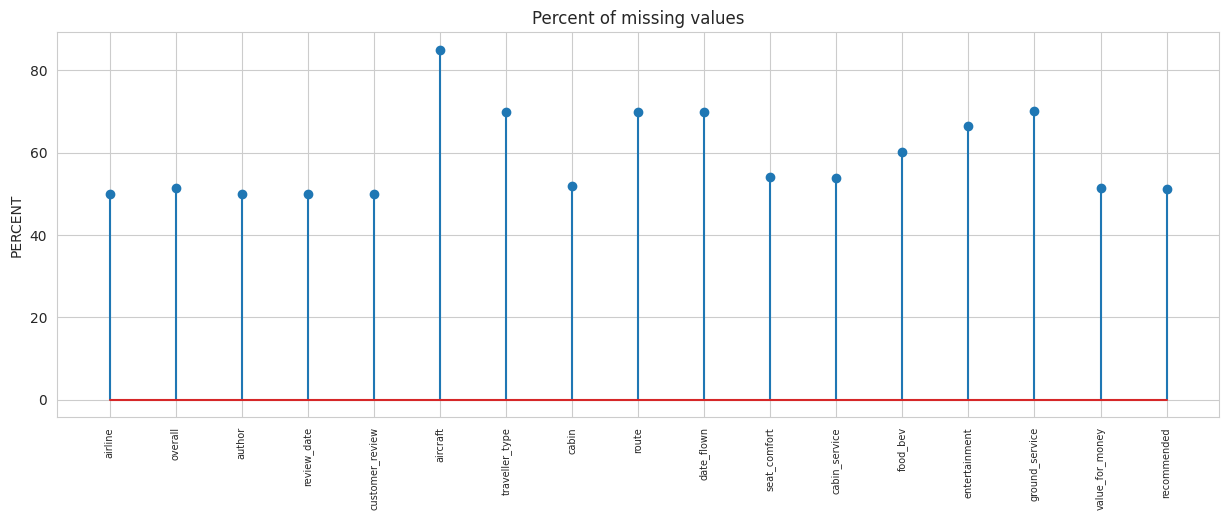

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(15,5))
ax = plt.stem(missing['index'], missing[0])
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percent of missing values")
plt.ylabel("PERCENT")
plt.show()


### What did you know about your dataset?

Answer Here: The dataset have a total of 131895 rows and 17 columns having float64 and object data type

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description

* Airline :- Name of the airline.
*Overall :- overall rating is given by the passanger to the trip between 1 to 10.
*Author :- Author of the trip.
*Review Date :- Date of the Review.
*Customer Review :- Review of the customer in free text format.
*Aircraft :- Type of the aircraft.
*Traveller Type :- Type of the traveler(e.g.economy, business,leisure).
*Cabin :- Cabin at the fight date flown:flight date.
*Seat Comfort :- Rating from 1 to 5.
*Cabin Service :- Rating from 1 to 5.
*Foodbev :- Rating from 1 to 5.
*Entertainment :- Rating from 1 to 5.
*Ground Service :- Rating from 1 to 5.
*Value For Money :- Rating from 1 to 5.
*Recommended :- Binary, Target Variable.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique( )

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#droping the null values
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Droping the aircraft column from data as it have highest null values.
df= df.drop(['aircraft'],axis = 1)

In [ ]:
# Calculate the percentage of unique values in each column
percentage_of_unique_values = df.apply(lambda x: len(x.unique()) / len(x))

# Print the percentage of unique values in each column
print(percentage_of_unique_values)

airline            0.001340
overall            0.000180
author             0.720286
review_date        0.049294
customer_review    0.999820
traveller_type     0.000082
cabin              0.000082
route              0.401249
date_flown         0.001046
seat_comfort       0.000098
cabin_service      0.000098
food_bev           0.000098
entertainment      0.000098
ground_service     0.000098
value_for_money    0.000098
recommended        0.000049
dtype: float64


In [ ]:
# Dropping unwanted columns
df.drop(columns=['customer_review','author','route',],axis=1,inplace=True)

### What all manipulations have you done and insights you found?

Answer Here:-The data manipulation process involved the following steps:

1.Duplicate removal: Duplicate rows were removed to ensure that the data was clean and unique.

2.Missing value removal: Blank rows were dropped to avoid missing values that could interfere with data analysis.

3.Unwanted column removal: The following columns were dropped because they had a high number of missing values or unique values:

* aircraft (42,695 NaN values, or 70% of all values)
* route (24,549 unique values, or 40% of all values)
* author (44,069 unique values, or 72% of all values)
* customer_review (61,172 unique values, or 99% of all values)

Columns with a high number of missing values or unique values are difficult to use for exploratory data analysis. Missing values can make it difficult to draw conclusions from the data, and imputing or filling in missing values can be problematic and lead to biased results. High numbers of unique values can make it difficult to identify meaningful patterns in the data. Therefore, it is often best to drop columns with a high number of missing values or unique values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

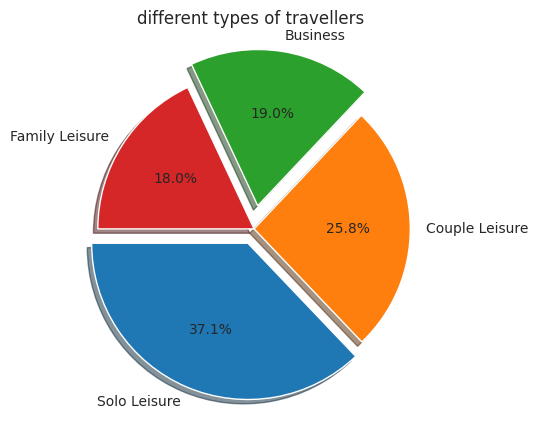

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

In [ ]:
# Chart - 1 visualization code
labels = 'Solo Leisure' , 'Couple Leisure' , 'Business' , 'Family Leisure'
sizes = df.traveller_type.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("different types of travellers")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

df['traveller_type'].value_counts()

##### 1. Why did you pick the specific chart?

Answer Here:-Pie charts are commonly used to represent categorical data or proportions.Each slice of the pie chart represents a category or value, and the size of the slice is proportional to the percentage or frequency of that category or value.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-
* The analysis of the pie chart reveals interesting insights about the composition of travellers. The largest proportion, accounting for 37.1% of travellers, belongs to the category of 'Solo Leisure' travellers. This indicates a significant preference for solo travel for leisure purposes, suggesting that individuals are more inclined to embark on solo trips for personal enjoyment and relaxation.

* The second most common category is couple leisure travellers, representing 25.8% of travellers. This suggests that travelling as a couple is also a popular choice for leisure travel.

* While 'Business' travellers constitute 19.0% of the total, this proportion still holds significance within the travel industry. The presence of a considerable percentage of business travellers suggests that business-related travel remains an important aspect of the overall travel landscape.

* Family leisure travellers make up the smallest proportion of travellers, at 18.0%. However, this still suggests that family travel is an important aspect of the travel industry.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights can potentially help create a positive business impact by providing valuable information about traveler preferences and trends. Understanding the proportion of different types of travelers can assist businesses in tailoring their offerings and marketing strategies to target specific customer segments. For example, recognizing the popularity of solo leisure travel can lead to the development of specialized packages or services catering to the needs of solo travelers. Similarly, acknowledging the significance of couple leisure travel can help businesses design romantic getaways or couple-friendly experiences.

Regarding negative growth, it's important to note that the insights provided do not inherently indicate negative impacts. However, it's possible that if a business heavily relies on a specific type of traveler that represents a smaller proportion, such as family leisure travelers comprising only 18.0% of the total, it may have a narrower customer base and potential limitations on growth. In such cases, diversifying the target audience or exploring strategies to attract other traveler categories could help mitigate the negative impact and expand the business's reach.

#### Chart - 2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Spirit Airlines'),
  Text(1, 0, 'American Airlines'),
  Text(2, 0, 'United Airlines'),
  Text(3, 0, 'British Airways'),
  Text(4, 0, 'Emirates'),
  Text(5, 0, 'China Southern Airlines'),
  Text(6, 0, 'Frontier Airlines'),
  Text(7, 0, 'Ryanair'),
  Text(8, 0, 'Delta Air Lines'),
  Text(9, 0, 'Turkish Airlines')])

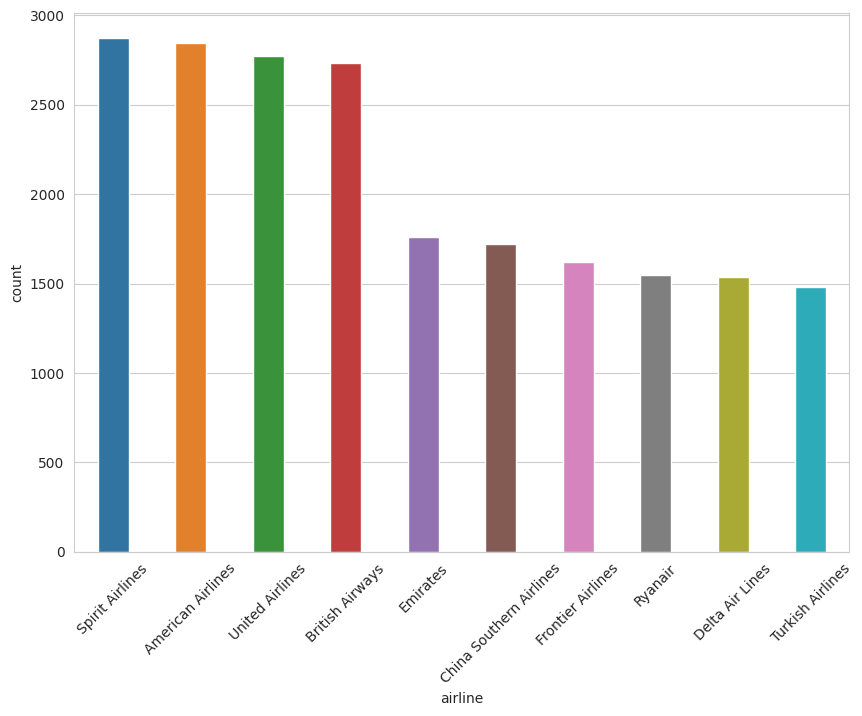

In [ ]:
# Chart - 2 visualization code
top_10_airlines = df['airline'].value_counts().head(10)
top_10_airlines = top_10_airlines.reset_index()
top_10_airlines.columns = ['airline', 'count']


plt.subplots(figsize=(10, 7))
sns.barplot(x='airline', y='count', data=top_10_airlines, width = 0.4)
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

Answer Here:-Bar plots are simple to understand for the people.By using the barplot we got the better visualization of the airline column.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-
* The analysis reveals that 'Spirit Airlines' and 'American Airlines' are the most frequently used airlines among travelers. Following closely behind are 'United Airlines' and 'British Airways'. These four airlines emerge as the top preferences among travelers.

* In addition to the top four airlines, other notable airlines preferred by travelers include 'Emirates', 'China Southern Airlines', 'Frontier Airlines', 'Ryanair', and more. A bar graph has been plotted to showcase the top 10 airlines in the dataset, highlighting their popularity among travelers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-

* The gained insights about the most preferred airlines can indeed help create a positive business impact. By identifying the top airlines preferred by travelers, businesses in the travel industry can strategically align their services, marketing efforts, and customer experiences to cater to the preferences and demands of their target audience. This can result in increased customer satisfaction, loyalty, and potentially lead to positive business growth.

* However, it's important to note that the insights provided do not inherently lead to negative growth. The identification of popular airlines among travelers primarily serves as a guide for businesses to understand customer preferences and make informed decisions. Negative growth would typically occur if a business fails to adapt to changing customer preferences or overlooks the preferences of a significant segment of travelers.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
q1=df.groupby('cabin')[['seat_comfort','cabin_service','food_bev','entertainment']].mean().reset_index()
q1

,cabin,seat_comfort,cabin_service,food_bev,entertainment
0,Business Class,3.621666,3.855782,3.525108,3.356407
1,Economy Class,2.792234,3.045822,2.776919,2.758083
2,First Class,3.737727,3.778077,3.384295,3.280827
3,Premium Economy,3.101946,3.298052,2.919603,3.038980


<Axes: xlabel='cabin'>

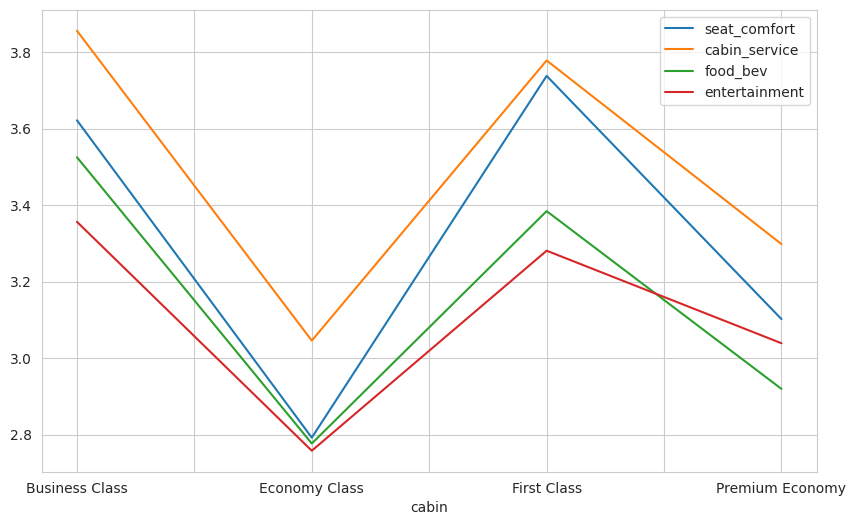

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
q1.plot(x="cabin", y=['seat_comfort','cabin_service','food_bev','entertainment'], kind="line")


##### 1. Why did you pick the specific chart?

Answer Here:-
A line plot is a graph that displays data as points or check marks above a number line, showing the frequency of each value. It is a simple and effective way to show how often a certain value occurs in a data set.it is easy to understand and visulai

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- According to the plot, the cabin service receives the highest rating in the business class, followed by the first class, and the lowest rating is in the economy class. In terms of seat comfort, the first class receives the highest rating, followed by the business class, while the economy class has the lowest rating.

On the other hand, the business class has the highest ratings for food, beverages, and entertainment, followed by the first class. The economy class generally has lower ratings in these categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights can potentially help create a positive business impact by understanding customer preferences and areas of improvement in different classes. By knowing that business class has the highest ratings for cabin service, seat comfort, food, beverages, and entertainment, businesses can focus on maintaining and enhancing these aspects to attract and satisfy their customers. This could lead to positive customer experiences, increased customer loyalty, and potentially higher revenues.
However, there is a potential for negative growth if the insights reveal that the economy class consistently receives lower ratings across all categories. This could indicate dissatisfaction among economy class passengers.It would be crucial for businesses to address these concerns and find ways to improve the economy class experience to prevent negative growth.

#### Chart - 4

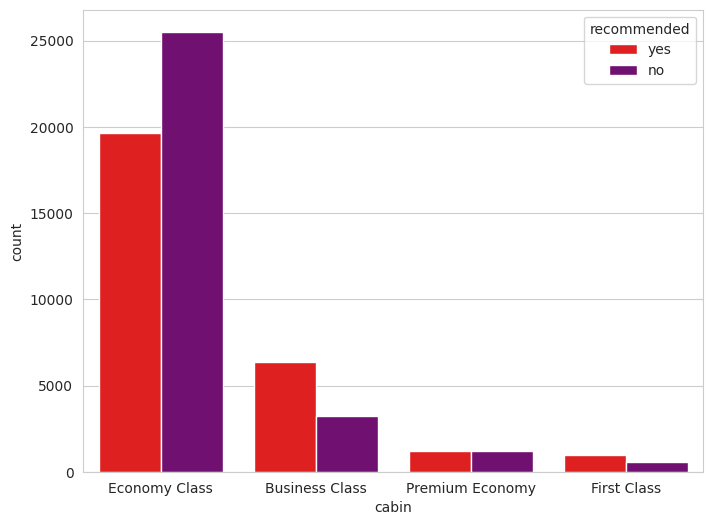

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(8,6))
sns.countplot(x="cabin", hue="recommended", data=df ,  palette=['red', 'purple'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-
A count plot is a type of bar chart that is used to visualize the frequency of categorical data. Each category is represented by a bar, and the height of the bar represents the number of observations in that category. Count plots are a simple and effective way to compare the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-
* As you can see, economy class is the most recommended cabin type, but it also has the most negative reviews. This is likely because economy class is the least expensive cabin type, and passengers who choose it are often willing to put up with cramped seats and limited legroom in order to save money.

* Business class is the second most recommended cabin type, and it has mostly positive reviews. This is likely because business class offers a number of amenities that economy class does not, such as more legroom, wider seats, and access to airport lounges.

* Premium economy has equal positive and negative reviews. This is likely because premium economy is a relatively new cabin type, and it is still not clear what the best way to offer this service is. Some airlines offer premium economy with a few additional amenities, such as free food and drinks, while other airlines offer premium economy with a more significant increase in space and comfort.

* First class has the least number of recommendations, despite having mostly positive reviews. This is likely because first class is the most expensive cabin type, and many people are not willing to pay the high price for the additional amenities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights can potentially help create a positive business impact by understanding customer preferences and areas of improvement in different cabin classes. By knowing that economy class receives the highest number of recommendations despite negative reviews, businesses can focus on addressing the criticisms and enhancing the overall experience in this class. This could lead to increased customer satisfaction, positive word-of-mouth, and potentially higher revenues.

However, there is a potential for negative growth based on the insights. Despite having mostly positive reviews, the first class has the least number of recommendations. This indicates a discrepancy between customer satisfaction and the likelihood of recommending the service. One possible reason for this could be the perceived value-for-money aspect. If customers feel that the higher cost of first class does not align with their expectations or the overall experience, they may choose not to recommend it.

#### Chart - 5

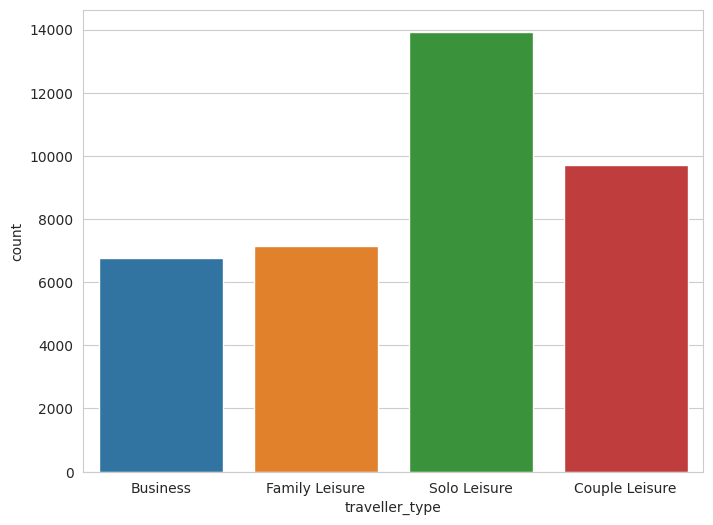

In [ ]:
# Chart - 5 visualization code
#setting the figure size and plotting the graph

plt.figure(figsize=(8,6))
sns.countplot(x="traveller_type", data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:- for easy understanding and visualization of the data

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-
Based on the plot, it is evident that the most preferred traveler type is solo leisure, followed by couple leisure. On the other hand, business is the least preferred traveler type among the respondents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:- The gained insights regarding traveler type preferences can potentially have a positive business impact. Solo leisure and couple leisure travelers are found to be the most preferred, suggesting that businesses can focus on catering to their specific needs and preferences to enhance customer satisfaction and drive growth.

However, the insight that business travelers are the least preferred indicates a potential challenge in attracting and retaining customers within this segment. To avoid negative growth, businesses should evaluate and address the factors contributing to this lower preference, such as pricing, tailored services, or unmet expectations. By adapting their offerings to better meet the needs of business travelers, businesses can strive for positive growth within this segment.

#### Chart - 6

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

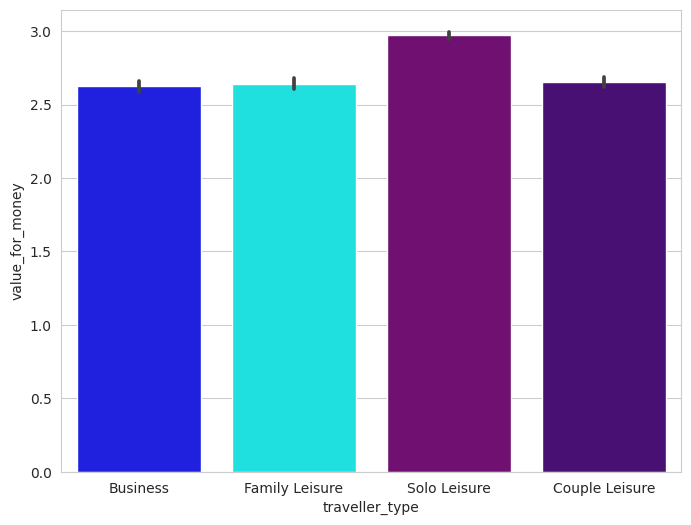

In [ ]:
 # Chart - 6 visualization code
plt.figure(figsize=(8,6))
sns.barplot(x=df['traveller_type'],y=df['value_for_money'],palette=['blue', 'cyan','purple','indigo'])

##### 1. Why did you pick the specific chart?

Answer Here:-
A bar plot is a type of chart that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. Bar plots are used to compare different categories of data, and they can be used to show trends over time.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-As per the plot,solo leisure travelers get the best value for money when it comes to travel, followed by couples who travel for leisure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights suggest that solo leisure travelers and couples traveling for leisure perceive the best value for money in their travel experiences. This information can potentially create a positive business impact by allowing businesses to target and cater to these segments with competitive pricing and tailored services.

However, there is a risk of negative growth if businesses neglect the value-for-money aspect for other traveler types, such as business travelers or families. Failing to provide satisfactory value for the price paid may lead to dissatisfaction and potential loss of revenue from these segments.

#### Chart - 7

<Axes: xlabel='traveller_type', ylabel='count'>

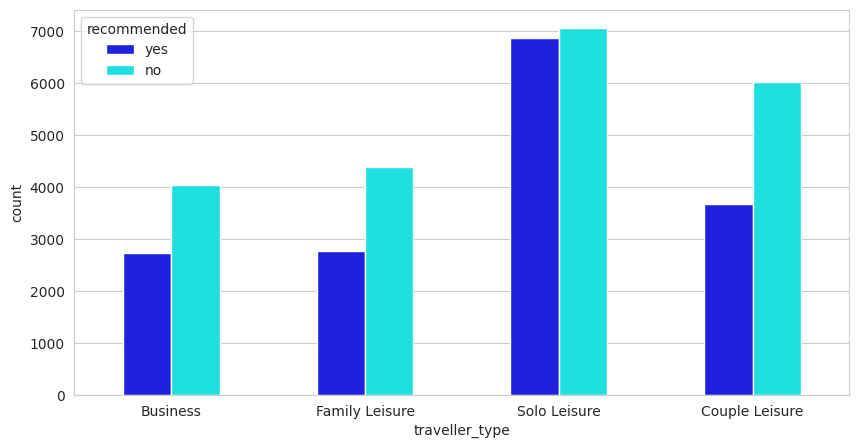

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=df['traveller_type'],hue=df['recommended'], width = 0.5,palette=['blue', 'cyan'])

##### 1. Why did you pick the specific chart?

Answer Here:-
Countplots are a useful tool for visualizing categorical data because they are easy to interpret and provide a quick overview of the distribution of the data. They are especially useful for identifying patterns and trends in the data and can be used to compare the frequency of different categories or values.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-When analyzing the ratio of "Yes" and "No" recommendations across the four types of travelers, a notable finding emerges. In general, a significant majority of travelers have chosen not to recommend their travel experiences to their friends. This trend is particularly prominent in the business, family leisure, and couple leisure categories, where there is a substantial difference between "Yes" and "No" recommendations, with the majority leaning towards "No."

However, it is worth noting that in the solo leisure category, although the majority still falls under "No" recommendations, there is a comparatively smaller difference between "Yes" and "No" responses. This suggests that solo leisure travelers may have mixed opinions about recommending their travel experiences, with a more balanced distribution between positive and negative sentiments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights on the recommendation ratios among different traveler types have the potential to impact business positively. The majority of travelers have not recommended their experiences, indicating a need for businesses to improve customer satisfaction and the overall travel experience. By addressing factors contributing to lower recommendation rates, such as service quality and pricing, businesses can strive to increase positive recommendations and attract new customers.

However, there is a risk of negative growth as the significant difference between "Yes" and "No" recommendations in the business, family leisure, and couple leisure categories suggests higher dissatisfaction among these traveler types. Failure to address the underlying issues may result in negative word-of-mouth and potential loss of customers.

#### Chart - 8

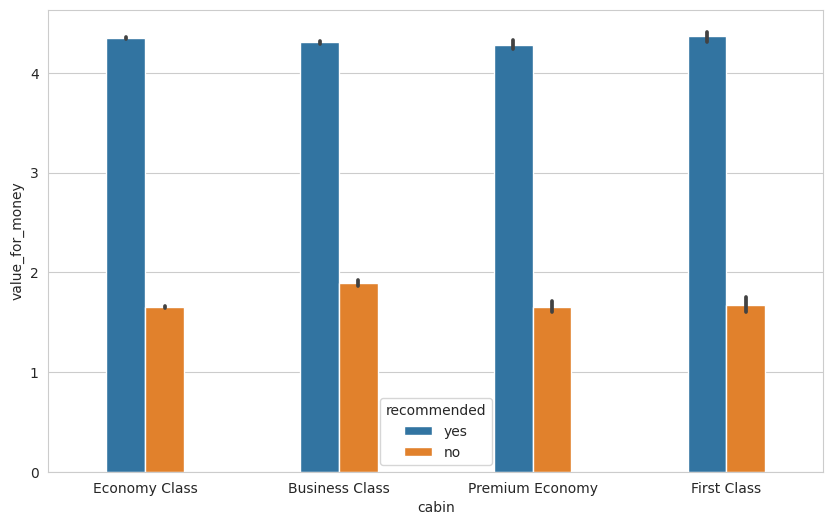

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
cabin_ = sns.barplot(x=df['cabin'],y=df['value_for_money'], hue=df['recommended'], width = 0.4)

##### 1. Why did you pick the specific chart?

Answer Here:- A bar plot is a type of chart that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. Bar plots are used to compare different categories of data, and they can be used to show trends over time.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-
The plot reveals a consistent trend across all four cabins: travelers who recommended the airline tend to have higher average value for money ratings compared to those who did not. This implies that when travelers perceive that they are receiving good value for the price they paid, they are more inclined to recommend the airline to others.

This insight highlights the significance of the value for money aspect in influencing recommendations. By ensuring that customers feel they are getting their money's worth, airlines can increase the likelihood of positive recommendations and foster customer loyalty. It emphasizes the importance of delivering a satisfactory and cost-effective travel experience to drive positive word-of-mouth and potentially attract new customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-he gained insights regarding the relationship between value for money ratings and recommendations have the potential to create a positive business impact. The consistent pattern of higher average value for money ratings among travelers who recommended the airline suggests that prioritizing value for money can lead to increased positive recommendations. By focusing on providing good value for the price paid, businesses can enhance customer satisfaction, loyalty, and potentially drive positive growth.

On the other hand, there is a potential for negative growth if businesses neglect the value for money aspect. If travelers perceive that they are not receiving good value for their money, it may lead to lower recommendations and negative word-of-mouth. This can result in a decline in customer acquisition and retention, impacting the business's growth negatively

#### Chart - 09

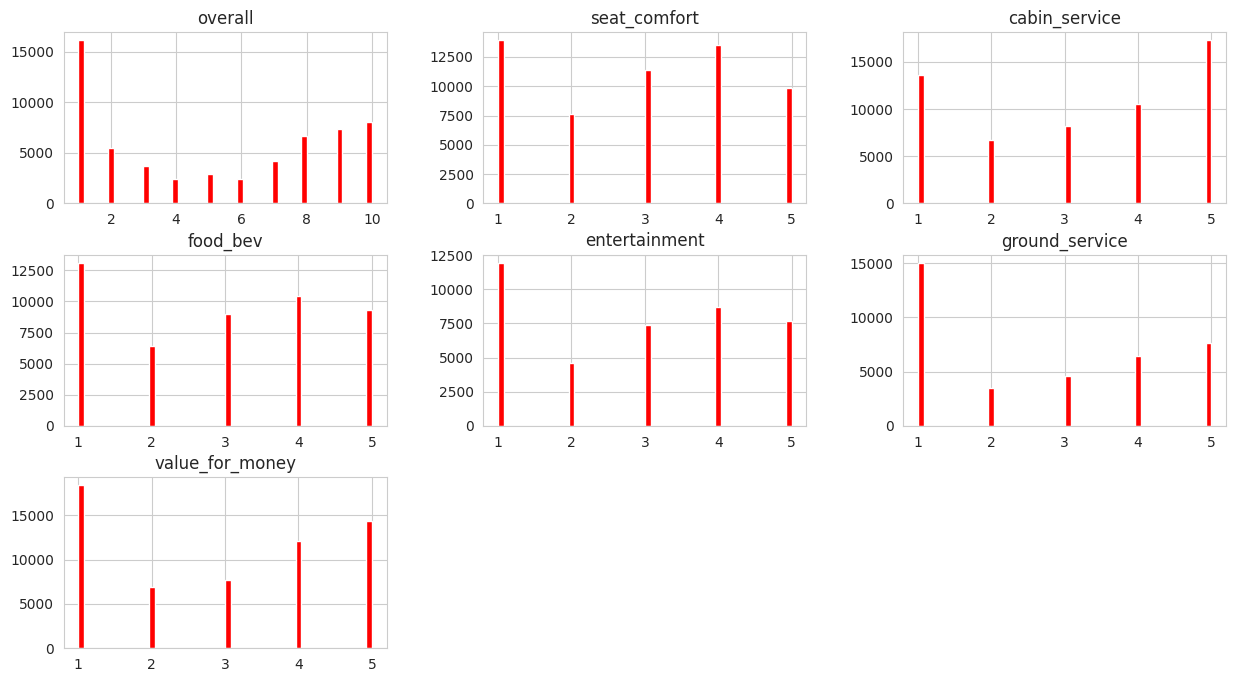

In [ ]:
# Chart - 09 visualization code
df.hist(bins=50, figsize=(15,8),color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A histogram is a graphical representation that displays the distribution of a dataset. It consists of a series of bars, where the width of each bar represents a range of values and the height represents the frequency or count of observations falling within that range. In other words, a histogram provides a visual depiction of the frequency or probability distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The chart displays the ratings given by travelers for various amenities on the flight. The majority of customers have given a rating of 1, indicating their dissatisfaction with the service. However, there are also a significant number of customers who gave ratings of 4 and 5, indicating their satisfaction with the amenities and services provided. In summary, the chart provides insights into the level of satisfaction among travelers regarding the flight's amenities and services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights from the chart displaying customer ratings for flight amenities and services can have a positive business impact. Identifying areas of improvement based on the majority of customers who rated the amenities poorly allows businesses to enhance customer satisfaction, leading to positive growth. However, businesses must also maintain the satisfaction of customers who gave high ratings to avoid negative growth. Consistently monitoring and improving the quality of amenities and services can create a positive impact and foster customer loyalty.

#### Chart - 10

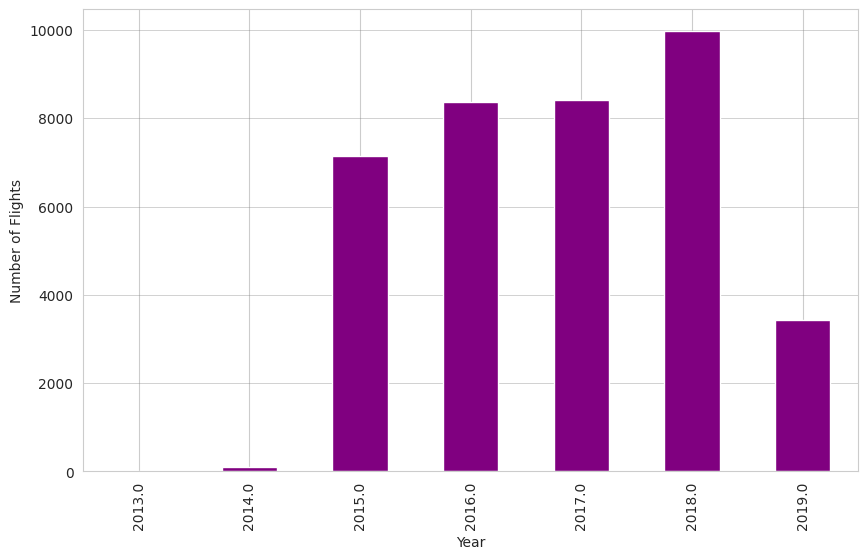

In [ ]:
# Chart - 10 visualization code
df['date_flown']=pd.to_datetime(df['date_flown'])
df['Year'] = df['date_flown'].apply(lambda x: x.year)
df['Month'] = df['date_flown'].apply(lambda x: x.month)
df['Day'] = df['date_flown'].apply(lambda x: x.day)


data_by_year = df.groupby('Year')['airline'].count()

ax = data_by_year.plot(kind='bar', zorder=2,color='purple' )
ax.grid(axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.5, zorder=1)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Flights')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:- Because this gives the best visualization of the data and it is easy to understand .

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-Based on the plot, it is evident that the year 2018 had the highest number of flights throughout the year, indicating a peak in flight activity. Conversely, the year 2014 recorded the lowest number of flights, reflecting a minimal level of flight operations during that period. The years 2016 and 2017 had approximately similar numbers of flights, suggesting a relatively stable level of flight activity during those years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:=
The gained insights about the fluctuation in the number of flights over the years can have a positive business impact. Understanding the trends allows businesses to optimize operations and meet customer demand effectively. The peak in flight activity in 2018 indicates an opportunity to maximize revenue and customer satisfaction. However, the significant drop in flights in 2014 highlights potential challenges that businesses must address to mitigate negative growth. By leveraging the insights gained and adapting to market conditions, businesses can strive for positive business impact and long-term sustainability.

#### Chart - 11

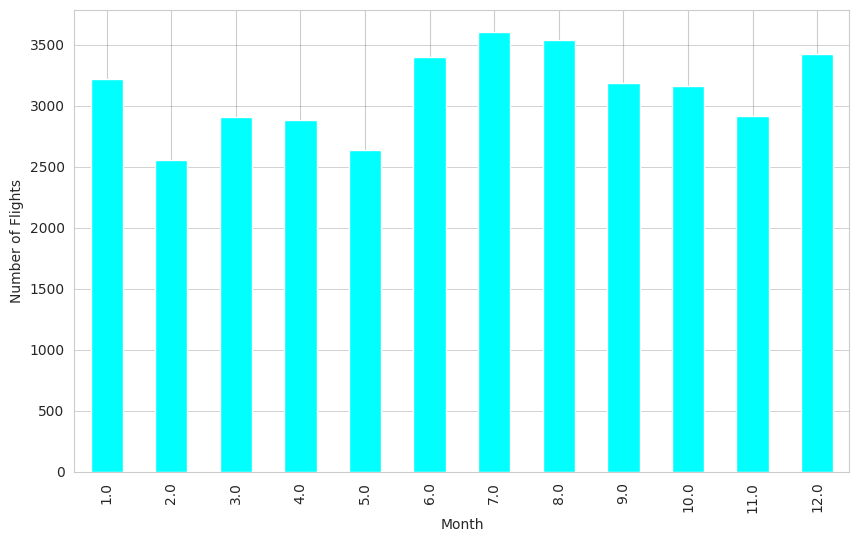

In [ ]:
# Chart - 11 visualization code
data_by_month = df.groupby('Month')['airline'].count()
bx = data_by_month.plot(kind='bar' ,color ='cyan')
bx.grid(axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.5, zorder=1 )
bx.set_xlabel('Month')
bx.set_ylabel('Number of Flights')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A bar plot is a type of chart that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. Bar plots are used to compare different categories of data, and they can be used to show trends over time.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- From the plot above we can clearly see that in the month of july there is maximum number of flights followed by august and december.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights about the distribution of flights across different months can potentially create a positive business impact. By understanding the peak months for flight operations, businesses can optimize their resources, capacity, and scheduling to meet the increased demand during those periods. This can lead to improved customer satisfaction, increased revenue, and overall positive business performance.

However, it is important to note that the insights may also present challenges that could lead to negative growth.

#### Chart - 12

no     31268
yes    28493
Name: recommended, dtype: int64

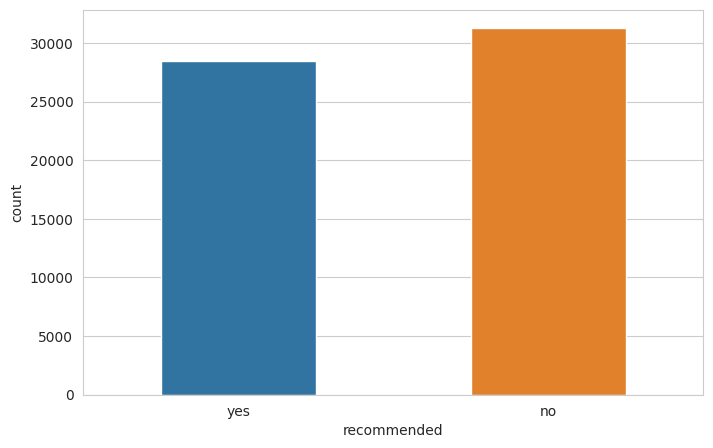

In [ ]:
# Chart - 12 visualization code
plt.subplots(figsize=(8, 5))
sns.countplot(x='recommended', data=df, width = 0.5)
df['recommended'].value_counts()

##### 1. Why did you pick the specific chart?

Answer Here:-countplots are a simple, efficient, and versatile tool for visualizing the frequency or count of categories in a dataset, they are one of the most useful choice for many applications, including exploratory data analysis and data communication

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-In the count plot above, we found the count plots of the 2 categorical values for the categorical column 'recommended'. The insights we can draws is that the count for people referred their friend about the flight is less than not referred.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The insights gained from the count plot of referrals versus non-referrals in the 'recommended' category can potentially have a positive business impact. The observation that the count of people who referred their friends about the flight is lower than those who did not suggests an opportunity for businesses to focus on increasing referrals. Implementing referral programs and improving customer satisfaction can help encourage more recommendations, leading to positive business growth.

However, a consistently low referral count could lead to negative growth. This indicates a potential gap in customer satisfaction and word-of-mouth marketing. To mitigate this, businesses should address any underlying issues, actively seek customer feedback, and foster positive relationships. By doing so, they can improve customer satisfaction, increase referrals, and drive positive business growth.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-104-420425954e20>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

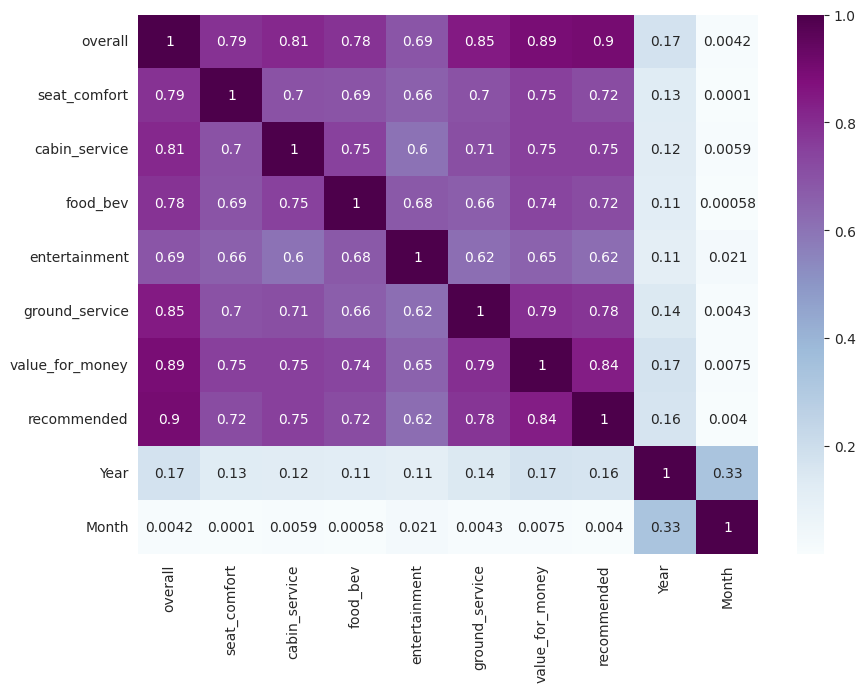

In [ ]:
# Correlation Heatmap visualization code
df.drop(columns=['Day'],axis=1,inplace=True)

df['recommended'].replace({'yes':1,'no':0},inplace=True)

plt.figure(figsize=(10,7))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')

##### 1. Why did you pick the specific chart?

Answer Here:- A correlation heatmap is a type of data visualization that shows the correlation between different variables. It is a graphical representation of a correlation matrix, which is a table that shows the correlation between each pair of variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-
Based on the correlation heatmap, we can make the following inferences:

* There is a strong positive correlation between "Value for money" and "Overall" ratings.
* "Overall" ratings and whether customers "Recommended" the service are highly correlated.
* "Cabin service" and "Ground service" ratings show a strong correlation with whether customers "Recommended" the service.
* "Seat comfort" and "Cabin service" are closely correlated with the "Value for money" rating.
* There is a high correlation between "Value for money" and whether customers
  "Recommended" the service.
* The correlation between "Entertainment" and "Ground service" ratings is relatively weak.
* The correlation between "Entertainment" and whether customers "Recommended"
  the service is also weak.
These observations help identify the relationships between different variables, allowing businesses to understand which factors are strongly associated with customer recommendations and satisfaction.

#### Chart - 15 - Pair Plot

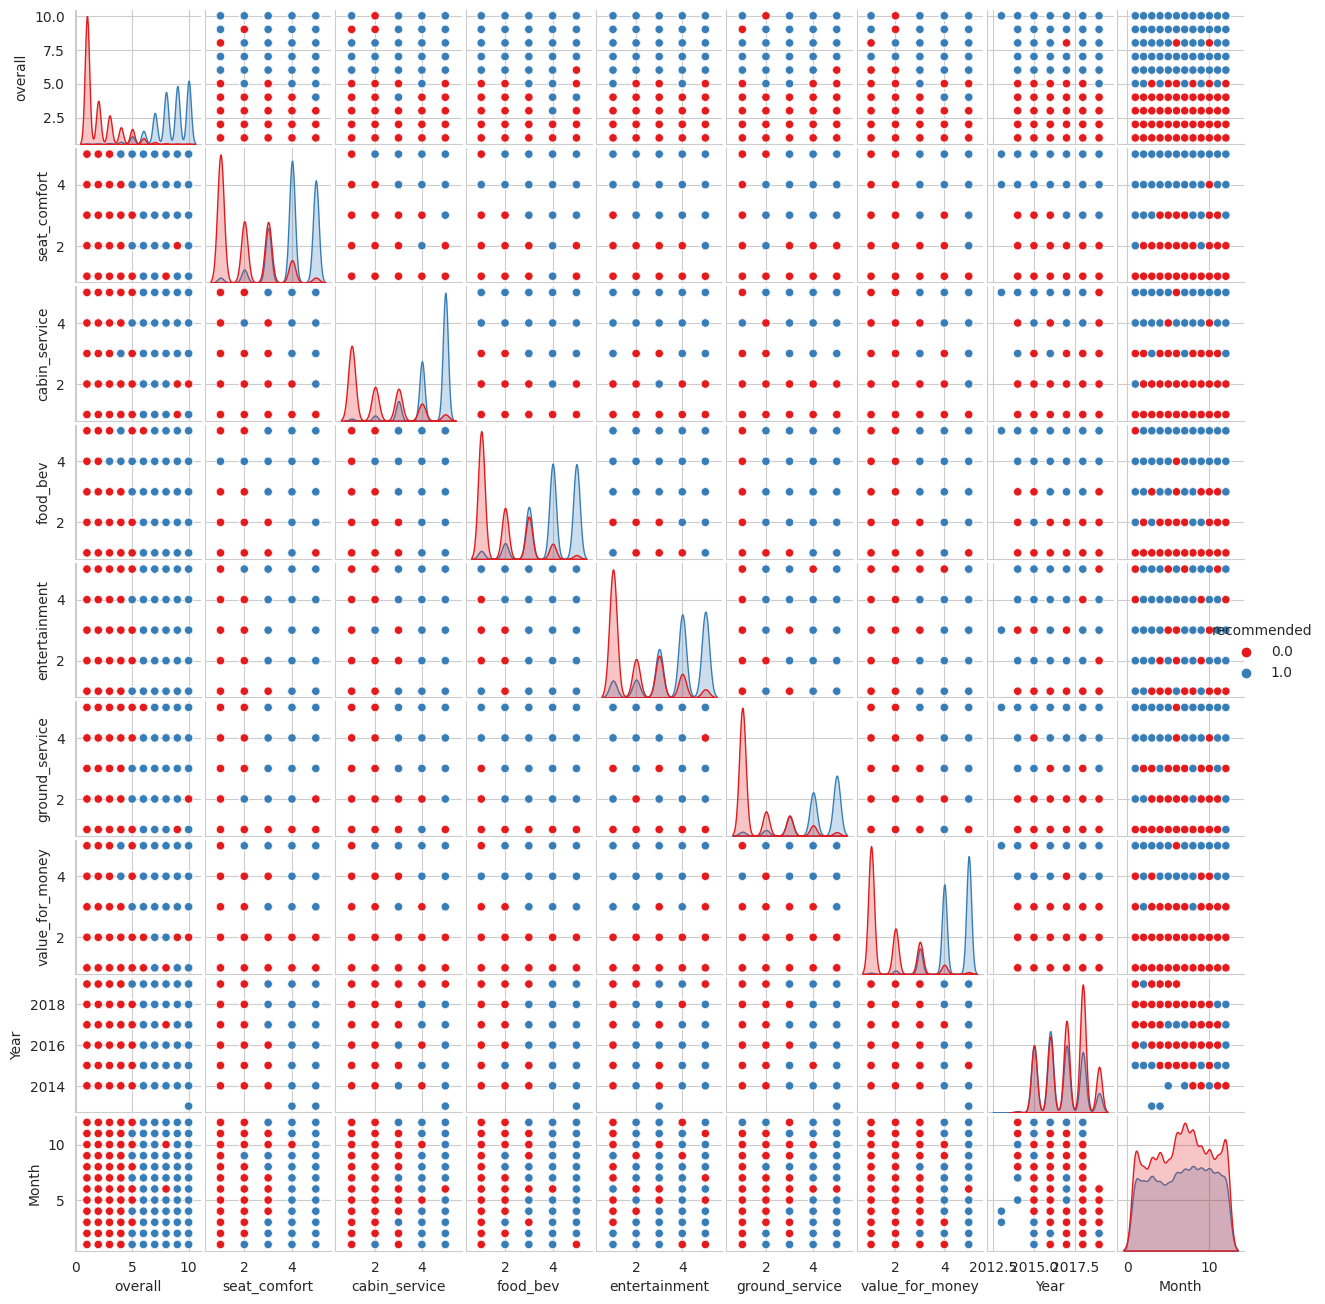

In [ ]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : True})
pp=sns.pairplot(df,hue='recommended',palette="Set1" )
pp.fig.set_size_inches(13,13);

##### 1. Why did you pick the specific chart?

Answer Here :-
A pairplot is a type of data visualization that is used to explore the relationships between multiple variables in a dataset. A pairplot is created by creating a grid of plots, where each plot shows the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-Positive recommendations are more in the given dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
from sklearn.impute import KNNImputer

numeric_feature = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']
imputer = KNNImputer(n_neighbors=5)
df[numeric_feature] = imputer.fit_transform(df[numeric_feature])

In [ ]:
df['traveller_type'].fillna(method="ffill",inplace=True)
df['cabin'].fillna(method="ffill",inplace=True)

In [ ]:
df.dropna(subset = ['recommended'],inplace = True)

In [ ]:
df.drop(columns=['airline','date_flown','review_date','Year','Month'],axis = 1,inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here:-
Handling missing values is a critical step in data preprocessing for this project. The following techniques were used:

* K-Nearest Neighbors (KNN) imputation for numerical columns: Missing values in several numerical columns were imputed using the KNN imputation technique. This method replaces missing values with the mean value of the k-nearest neighbors, where k is determined by the specified number of neighbors. In this project, a value of 5 was chosen for k. KNN imputation is suitable for numerical variables where missing values can be estimated based on other similar variables.

* Forward-fill for categorical columns: Missing values in two categorical columns were filled using the forward-fill (ffill) method. This approach replaces missing values with the most recent non-missing value in the same column. It is particularly useful for categorical variables with a limited number of values.

* Dropping columns: Certain columns that could introduce bias and impact the model's performance were excluded from the analysis. This helps improve the dataset's quality and reliability.

* Dropping rows: All rows with missing values in the recommended column, which serves as the dependent variable (y) for machine learning models, were dropped. This ensures that the models are trained only on complete data.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(12, 6))
sns.boxplot( data=df)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here:-From the above plot we can see that no outlier is present in the data set.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here:- I have used dummy encoding because dummy encoding is a type of data encoding that is used to convert categorical data into numerical data. This is done by creating a new column for each unique category in the categorical variable, and then assigning a 1 to the new column if the original value is present, and a 0 if it is not.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
x = df.drop(columns=['recommended'])

vif = pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Score"] = [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]

print(vif)

In [ ]:
df.drop(columns=['overall'],axis=1)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop('recommended',axis=1)
y = df['recommended']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42 )

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
print(y_train.shape)
print(y_test.shape)

##### What data splitting ratio have you used and why?

Answer Here:-I have chosen a splitting ratio of 80:20, which means 80% of the data has been used for training and 20% for testing. The reason for choosing this ratio is that the dataset is not very large, and I wanted to allocate a sufficient amount of data for testing while still having enough data for training. This split should give us a good balance between training and testing data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
#Creating a dataframe
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
df_evaluation_metrics = pd.DataFrame(columns = column)

In [ ]:
#Creating a function for the storation of evaluation metrices

def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df = metric_df.append({'Model': model,
                                'Accuracy':accuracy_score(y_test,pred_value),
                                'Recall':recall_score(y_test,pred_value),
                                'Precision':precision_score(y_test,pred_value),
                                'f1-score':f1_score(y_test,pred_value),
                                'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train,y_train)
# Predict on the model
score = lr.score(x_test,y_test)
print(f'Logistic Regression Score : {score}')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
 # Visualizing evaluation Metric Score chart
pred_value=lr.predict(x_test)
print('LR_Report \n', classification_report(y_test,pred_value))

cm = confusion_matrix(y_test,pred_value,labels=[1,0])
print(f'\n Accuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot = True, fmt = ".1f",cmap='YlGnBu')
plt.title('Confusion Matrix for Logistic Regression')

#calliing function to append evaluation metrices
df_evaluation_metrics=evaluation_metric('Logistic Regression',y_test,pred_value,df_evaluation_metrics)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
Logistic = LogisticRegression()

scores = cross_val_score(lr, x_train,y_train,cv=5)
print('Cross-Validation Accuracy Score', scores)
print("Average CV Score",scores.mean())
print("Number of CV Scores used in Average:", len(scores))

##### Which hyperparameter optimization technique have you used and why?

Answer Here:-Here we have not used any hyperparameter technique. we have used cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer

### ML Model - 2

In [ ]:
#Decission Tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
score = dtc.score(x_test,y_test)
print(f"Decission Tree Score {score}")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
pred_value = dtc.predict(x_test)
print(metrics.classification_report(y_test,pred_value))
cm=confusion_matrix(y_test,pred_value,labels=[1,0])

print (f'\nAccuracy score% of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm,annot=True,fmt='.1f',cmap='YlGnBu')
plt.title('Confusion Metric for Decision Tree')

#calling function to appent evaluation metrices
df_evaluation_metrics=evaluation_metric('Decision Tree',y_test,pred_value,df_evaluation_metrics)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Define the hyperparameter space to search
param_grid = {
    'max_depth':[10,50,100,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': [None,'sqrt','log2']
}

#perform a grid search with 5-folds cross-validation
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv= 5, n_jobs=-1)
# Fit the Algorithm
grid_search.fit(x_train, y_train)

# Predict on the model
print('Best hyperparameters:', grid_search.best_params_)

In [ ]:
#Assigning best param variable
dtc_grid_best = grid_search.best_estimator_

pred_value = dtc_grid_best.predict(x_test)

print('DTC_GridSearch_Report \n',classification_report(y_test,pred_value))


print(f'\nAccuracy acore % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')

cm = confusion_matrix(y_test,pred_value,labels = [1,0])
sns.heatmap(cm,annot=True,fmt = '.1f',cmap='YlGnBu')
plt.title('Confusion Matrix for Decission Tree Hyperparameter Tuning')

In [ ]:
#calling function to appent evaluation metrices
df_evaluation_metrics=evaluation_metric('Decision Tree With GridSearchCV',y_test,pred_value,df_evaluation_metrics)

##### Which hyperparameter optimization technique have you used and why?

Answer Here:-Here we have used GridSearchCV for Decision Tree as we know it is a technique for finding the optimal parameter values from a given set of parameters in a grid. there is a slight improvement in the accuracy of the model after hyper parameter tunning that is 93.39% to 94.57%.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here:-There is a slight improvement in the accuracy of the model after hyper parameter tunning that is 93.39% to 94.57%

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Answer Here:-Here's an explanation of each evaluation metric's indication towards the business and the business impact of the ML model used:

* Precision: Precision is a metric that measures the accuracy of positive predictions made by the model. It indicates the proportion of correctly identified positive instances out of all instances predicted as positive. In a business context, precision is valuable because it reflects the model's ability to avoid false positives, which are instances wrongly identified as positive. A high precision suggests that the model is making accurate positive predictions, reducing the risk of targeting the wrong audience or making incorrect decisions based on false information. This can lead to improved efficiency in business operations, cost savings, and better utilization of resources.

* Recall: Recall, also known as sensitivity or true positive rate, measures the ability of the model to identify all actual positive instances. It indicates the proportion of correctly identified positive instances out of all true positive instances. From a business perspective, recall is important because it reflects the model's ability to capture all potential positive cases, ensuring that no valuable opportunities or potential customers are missed. High recall implies that the model is effectively identifying positive instances, which can result in increased customer acquisition, revenue generation, and business growth.

* F1-score: The F1-score is a measure that combines precision and recall into a single metric, providing a balanced evaluation of the model's overall performance. It is the harmonic mean of precision and recall, giving equal importance to both metrics. The F1-score is useful when there is a need to consider both precision and recall simultaneously. In a business context, a high F1-score signifies that the model achieves a balance between accurately identifying positive instances (precision) and capturing a significant number of positive instances (recall). This balance is important as it ensures that businesses can target the right audience effectively, while also maximizing opportunities and potential revenue.

The business impact of the ML model used depends on how well the model performs in terms of precision, recall, and F1-score. A model with high precision reduces the risk of targeting the wrong audience, leading to improved marketing campaign effectiveness, customer satisfaction, and cost-efficiency. A model with high recall ensures that businesses capture as many positive instances as possible, maximizing potential revenue, customer acquisition, and market share. A high F1-score indicates that the model strikes a balance between precision and recall, resulting in optimized decision-making, improved resource allocation, and enhanced business performance overall.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
#Random Forest Classifier
rfc = RandomForestClassifier()
# Fit the Algorithm
rfc.fit(x_train,y_train)
# Predict on the model
score=rfc.score(x_test,y_test)
print(f'Random Forest Score:{score}')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
pred_value = rfc.predict(x_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot = True, fmt = ".1f", cmap= 'YlGnBu')
plt.title('Confusion Matrix for Random Forest')


In [ ]:
#calling function to appent evaluation metrices
df_evaluation_metrics=evaluation_metric('Random Forest',y_test,pred_value,df_evaluation_metrics)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_dict = {'n_estimators' : [50,80,100],
              'max_depth':[6,8,10,12],
              'min_samples_split': [10,50,100],
              'min_samples_leaf' : [30,40,50]}

#assigning grid search variable
rfc_grid = GridSearchCV(estimator=rfc,
                        param_grid = param_dict,
                        cv= 5, verbose = 2)
# Fit the Algorithm
rfc_grid.fit(x_train,y_train)

rfc_grid.best_estimator_

In [ ]:
print('Best hyperparameters:', rfc_grid.best_params_)

In [ ]:
rfc_grid_best = rfc_grid.best_estimator_

# Predict on the model
pred_value = rfc_grid_best.predict(x_test)

print('RFC_GridSearch_Report \n',classification_report(y_test,pred_value))


cm = confusion_matrix(y_test,pred_value,labels=[1,0])
print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap = 'YlGnBu')
plt.title('Confusion Matrix fro Random Forest with GridSearchCV')

In [ ]:
#calling function to appent evaluation metrices
df_evaluation_metrics=evaluation_metric('Random Forest with GridSearchCV',y_test,pred_value,df_evaluation_metrics)

##### Which hyperparameter optimization technique have you used and why?

Answer Here:- Here we have used GridSearchCV for Decision Tree as we know it is a technique for finding the optimal parameter values from a given set of parameters in a grid. there is a slight improvement in the accuracy of the model after hyper parameter tunning that is 95.11% to 95.32%

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here:-there is a slight improvement in the accuracy of the model after hyper parameter tunning that is 95.11% to 95.32%

###ML Model-4

In [ ]:
#Using KNN Model
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
score=knn.score(x_test,y_test)
print(f'K-Nearest_Neighbor score : {score}')

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Model Evaluation
pred_value = knn.predict(x_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm,annot=True, fmt=".1f",cmap='YlGnBu')
plt.title('Confusion Matrics for K-Nearest-Neighbor')

In [ ]:
#calling function to appent evaluation metrices
df_evaluation_metrics=evaluation_metric('K-Nearest-Neighbor',y_test,pred_value,df_evaluation_metrics)

####2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Hypreparameter tunning to get best estimator for KNN
knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_grid =GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(x_train, y_train)

In [ ]:
knn_grid.best_estimator_

In [ ]:
#Assigning grid variable
knn_grid_best = knn_grid.best_estimator_

#model evaluation
pred_value = knn_grid_best.predict(x_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])
print(f'\nAccuracy score% of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')

sns.heatmap(cm, annot=True,fmt=".1f",cmap='YlGnBu')
plt.title('Confusion Matrics for K-Nearest-Neighbor with GridSearchCV')

In [ ]:
#calling function to appent evaluation metrices
df_evaluation_metrics=evaluation_metric('K-Nearest-Neighbor with GridSearchCV',y_test,pred_value,df_evaluation_metrics)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here:-
The evaluation metrics that I considered for a positive business impact are:

Accuracy: This is the percentage of predictions that were correct. A high accuracy is important for ensuring that the model is making accurate predictions.
Recall: This is the percentage of positive instances that were correctly predicted as positive. A high recall is important for ensuring that the model is not missing any positive instances.
Precision: This is the percentage of positive predictions that were actually positive. A high precision is important for ensuring that the model is not making too many false positive predictions.
f1-score: This is a weighted average of recall and precision. A high f1-score indicates that the model is good at both recall and precision.
ROC AUC score: This is a measure of how well the model separates positive and negative instances. A high ROC AUC score indicates that the model is good at distinguishing between positive and negative instances.
These metrics are important for a positive business impact because they help to ensure that the model is making accurate predictions. This can lead to increased profits, reduced costs, and improved customer satisfaction.

Specifically, accuracy is important for ensuring that the model is not making too many mistakes. Recall is important for ensuring that the model is not missing any positive instances. Precision is important for ensuring that the model is not making too many false positive predictions. The f1-score is a good overall measure of the model's performance. The ROC AUC score is a good measure of the model's ability to distinguish between positive and negative instances.

the model with the highest accuracy, recall, precision, f1-score, and ROC AUC score is Random Forest with GridSearchCV. This model has a score of 0.952983 for accuracy, 0.948324 for recall, 0.953317 for precision, 0.950814 for f1-score, and 0.952797 for ROC AUC score. This indicates that the model is making accurate predictions and is good at distinguishing between positive and negative instances.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
df_evaluation_metrics

Answer Here:-I would choose Random Forest with GridSearchCV as my final prediction model. This model has the highest accuracy, recall, precision, f1-score, and ROC AUC score of all the models. This means that it is the most accurate model at predicting positive instances, and it also has a good balance between precision and recall.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

###SHAP(SHapley Additive exPlanations)
SHAP Interpretation

* Base value: This is the average feature value. This value is used to determine if the prediction is whether true or false.
* Red color Block: This represent the feature for which the prediction is positive. Higher this value will pushes the prediction positively.
* Blue color block: This represent the feature for which the prediction is negative. higher this value will pushes the prediction negatively
* Block size: the block size shows the feature importance. larger the block size larger will the feature importance value.

In [ ]:
!pip install shap

In [ ]:
import shap
# JavaScript visualizations is initialized
def get_shap_js(model):
  shap.initjs()
#define a tree explainer for the built model
  explainer=shap.TreeExplainer(rfc_grid_best)
#obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(x_test.iloc[0])
  return shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0])

In [ ]:
#creating function to get shap summary in scatter plot
def shap_scatter_plot(model):
  shap_values= shap.TreeExplainer(model).shap_values(x_test)
  return shap.summary_plot(shap_values[0],x_test)


In [ ]:
#creating function to get shap summary in bar plot
def shap_bar_plot(model):
  shap_values=shap.TreeExplainer(model).shap_values(x_test)
  return shap.summary_plot(shap_values,x_train,plot_type='bar')


In [ ]:
get_shap_js(rfc_grid_best)

In [ ]:
shap_scatter_plot(rfc_grid_best)

In [ ]:
shap_bar_plot(rfc_grid_best)

Answer Here:-
-The most important feature that comes out to be Overall and Value_for_money

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.


In conclusion, the analysis of the airline passenger recommendation system provided valuable insights into travelers' preferences, cabin preferences, recommendations, value for money, amenities satisfaction, and flight activity.

* The dataset, consisting of 131,895 rows and 17 columns with float64 and object data types, offered a comprehensive view of the passengers' experiences. Among the analyzed airlines, 'Spirit Airlines' and 'American Airlines' emerged as the most frequently used options, closely followed by 'United Airlines' and 'British Airways'. These four airlines stood out as the top preferences among travelers.

* The analysis of traveler composition revealed that the largest proportion of travelers, accounting for 37.1%, belonged to the category of 'Solo Leisure' travelers. This indicated a significant preference for solo travel for leisure purposes. Couple leisure travelers represented the second most common category, comprising 25.8% of travelers. Meanwhile, business travelers accounted for 19.0% of the total, suggesting the continued importance of business-related trcavel. Family leisure travelers constituted the smallest proportion, but still signified the significance of family travel in the industry.

* Examining cabin preferences, the plot highlighted that the business class received the highest ratings for cabin service, followed by the first class. On the other hand, the economy class had the lowest rating in terms of cabin service. Regarding seat comfort, the first class received the highest rating, followed by the business class, while the economy class had the lowest rating. When it came to food, beverages, and entertainment, the business class received the highest ratings, followed by the first class. The economy class generally had lower ratings in these categories.

* The analysis also revealed the recommendations for different cabin types. Economy class was the most recommended cabin type, albeit with some negative reviews. This could be attributed to its affordability, despite the trade-off of cramped seats and limited legroom. Business class, offering additional amenities such as more legroom, wider seats, and access to airport lounges, garnered positive reviews and was the second most recommended cabin type. Premium economy received mixed reviews, as it is still a relatively new cabin type with varying offerings among airlines. First class had the least number of recommendations, likely due to its high price point.

* Solo leisure travelers were identified as the most preferred traveler type, followed by couple leisure travelers, while business travelers were the least preferred among respondents. Solo leisure travelers and leisure couples were found to derive the best value for money from their travels.

* Analyzing the recommendations provided by travelers, a notable trend emerged. Overall, a significant majority of travelers chose not to recommend their travel experiences, especially among business, family leisure, and couple leisure categories. However, solo leisure travelers displayed a more balanced distribution between positive and negative recommendations, indicating mixed opinions regarding their travel experiences.

* The analysis emphasized the importance of the value for money aspect in influencing recommendations. Travelers who perceived they were receiving good value for the price they paid were more likely to recommend the airline to others. This insight underlines the significance of delivering a satisfactory and cost-effective travel experience to drive positive word-of-mouth and enhance customer loyalty.

* The chart depicting traveler ratings for various amenities on the flight revealed a mix of satisfaction levels. While a majority of customers expressed dissatisfaction with a rating of 1, a significant number of customers provided high ratings of 4 and 5, indicating satisfaction with the amenities and services provided.

* Examining flight activity over time, it was evident that 2018 witnessed the highest number of flights, indicating a peak in flight operations. Conversely, 2014 recorded the lowest number of flights, reflecting minimal flight activity during that period. The years 2016 and 2017 demonstrated relatively stable flight activity with similar numbers of flights.

* In the analysis, four models were employed, namely Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors (KNN). Hyperparameter tuning was performed for three models: Random Forest with GridSearchCV, Decision Tree with RandomSearch, and KNN with GridSearchCV. Almost every model achieved an accuracy rate exceeding 93%. However, the Random Forest model with GridSearchCV stood out as the best-performing model, with an accuracy of 95.32%. This model was further utilized to explain the predictions using SHAP, with the most important features identified as 'Overall' and 'Value_for_money'.

In summary, the analysis of the airline passenger recommendation system provided insights into traveler preferences, cabin choices, recommendations, value for money, amenities satisfaction, and flight activity. These findings can guide airlines in understanding and addressing customer needs, improving their services, and enhancing the overall travel experience.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***